In [70]:
import pandas as pd
from numpy import percentile
import scipy.stats
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy import stats

In [91]:
stats.ttest_ind(rand,a)


Ttest_indResult(statistic=0.5461821125601757, pvalue=0.5861820444893707)

Number of Runs: 50
Min: 8.000
Q1: 26.250
Median: 34.000
Q3: 39.000
Max: 57.000
Mean: 33.720
The 95.0% confidence interval is between 30.813 and 36.627.


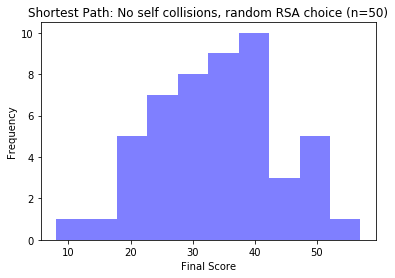

In [86]:
a = get_array_from_file('better-shortest_lifetime_log.txt')
rand = get_array_from_file('better-shortest-rand_lifetime_log.txt')
print("Number of Runs: " + str(len(a)))
five_number_summary(a)
mean_confidence_interval(a)
histogram(a)

In [76]:
def get_array_from_file(file_name):
    arr = []
    with open(file_name) as f:
        for l in f:
            arr.append(int(l))
    return np.asarray(arr)

In [65]:
def histogram(a):
    num_bins = 10
    n, bins, patches = plt.hist(a, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel('Final Score')
    plt.ylabel('Frequency')
    plt.title('Shortest Path: No self collisions, random RSA choice (n=' + str(len(a)) +')')
    plt.show()
    plt

In [24]:
def five_number_summary(lst):
    lst = np.asarray(lst)
    quartiles = percentile(lst, [25, 50, 75])
    # calculate min/max
    data_min, data_max, data_mean = lst.min(), lst.max(), lst.mean()
    # print 5-number summary
    print('Min: %.3f' % data_min)
    print('Q1: %.3f' % quartiles[0])
    print('Median: %.3f' % quartiles[1])
    print('Q3: %.3f' % quartiles[2])
    print('Max: %.3f' % data_max)
    print('Mean: %.3f' % data_mean)

In [40]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    print("The " + str(confidence *100) +"% confidence interval is between " + 
          str(round(m-h, 3)) + " and " + str(round(m+h,3))+ ".")